In [1]:
# loading libraries and reading the data
import numpy as np
import pandas as pd

# Loading the required csvs for analysis
companies  = pd.read_csv("./companies.csv", encoding='iso-8859-1')
rounds2 = pd.read_csv("./rounds2.csv", encoding='iso-8859-1')

In [2]:
companies.tail()
# Gibberish characters in companies dataframe

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [3]:
# Fixing the encoding issue and have clean dataframe
companies.permalink = companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')
companies.name = companies.name.str.encode('utf-8').str.decode('ascii','ignore')
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,novatiff Reklam ve Tantm Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [4]:
# To get the unique number of companies in companies dataframe we have all the company permalinks in "Upper" case and
# then find the Unique Number
companies['permalink'] = companies['permalink'].astype('str').str.upper()
len(companies.permalink.unique())

66368

In [5]:
# There seems to be something wrong with loaded rounds2 dataframe are the number of unique companies from this dataframe should
# similar to unique number of companies from "companies" dataframe if we intend to use both these dataframes for analysis
len(rounds2.company_permalink.unique())

90247

In [6]:
# Found some rows with gibberish characters which are not decoded properly
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [7]:
# Decoding for the defects found in above cell
rounds2.company_permalink = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')
# To find the unique companies in "rounds2" dataframe making the company_permalink variable values to Upper case
rounds2['company_permalink'] = rounds2['company_permalink'].astype('str').str.upper()

In [8]:
# Now it seems to right as the number of unique companies in both the dataframe are same.
len(rounds2.company_permalink.unique())

66368

In [9]:
# To find whether there are any companies in rounds2 which are not in companies dataframe
# There seems to be no such company as it says all the companies in rounds2 dataframe are in companies dataframe.
rounds2.company_permalink.isin(companies['permalink']).value_counts()

True    114949
Name: company_permalink, dtype: int64

In [10]:
# To find whether there are any companies in rounds2 which are not in companies dataframe
# There seems to be no such company.
# Other way to check the same.
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [11]:
rounds2.shape

(114949, 6)

In [12]:
# It can be seen that companies dataframe has only company related information and rounds2 dataframe has 
# the information about its status, investment gathered during different stages etc.
# Hence now we want to merge both these dataframes into one master_frame for further analysis.

# This merge can be inner merge because for all the rows for a company in rounds2 dataframe we want to add the columns from 
# companies dataframe corresponding to that company. Hence company_permalink for rounds2 datarfame and permalink for companies 
# dataframe are chosen to apply merge upon.
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')
# Checking the shape of merged dataframe to make sure it has merged as per our intention.
# The number of rows in rounds2 dataframe should remain same and only the columns should be added.
# In a way like adding company related information from companies dataframe to each company in rounds2 dataframe.
master_frame.shape

(114949, 16)

In [13]:
#Visually inspecting what said in the previous cell 
master_frame.sample(10)
# In this dataframe the company_permalink and permalink variable should be same for each row.

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
70542,/ORGANIZATION/ONEPROVIDER-COM,/funding-round/8b4ada9352d28837e146150a2b0b0446,seed,NaN,17-11-2013,60000.0,/ORGANIZATION/ONEPROVIDER-COM,OneProvider.com,http://oneprovider.com,Networking|Web Hosting,operating,CAN,QC,Montreal,Laval,21-03-2012
101371,/ORGANIZATION/TOONBOX,/funding-round/e0fb9d1e7c0740cb65e17d83ee0630b6,grant,NaN,24-12-2012,1010999.0,/ORGANIZATION/TOONBOX,Toonbox,http://toonbox.info/,Entertainment|Services|Video,operating,CYP,6,CYP - Other,Paphos,05-05-2008
74863,/ORGANIZATION/PHARMATROPHIX,/funding-round/32da3347cd921e8807b6687030175fda,venture,NaN,15-03-2010,179936.0,/ORGANIZATION/PHARMATROPHIX,PharmatrophiX,http://pharmatrophix.com,Biotechnology,operating,USA,NC,Raleigh,Raleigh,01-01-2005
54149,/ORGANIZATION/KWIRY,/funding-round/c0ec3fb8c39347be3aa1f0e0a03ba7b1,venture,A,17-03-2007,1000000.0,/ORGANIZATION/KWIRY,kwiry,http://www.kwiry.com,Content|Mobile|Search|SMS,closed,USA,CA,SF Bay Area,San Francisco,01-01-2006
81375,/ORGANIZATION/RARECYTE,/funding-round/7c74e2154ddfd73bcd205d77a79c09dd,undisclosed,NaN,21-08-2012,NaN,/ORGANIZATION/RARECYTE,RareCyte,http://www.rarecyte.com,Biotechnology,operating,USA,WA,Seattle,Seattle,NaN
106610,/ORGANIZATION/VERSIE-CHRISTIAN-COMPANION,/funding-round/1b2b1b5d5f0b425e87727946a75804fe,equity_crowdfunding,NaN,14-04-2013,NaN,/ORGANIZATION/VERSIE-CHRISTIAN-COMPANION,Versie Christian Companion,NaN,Consulting,operating,USA,NV,Las Vegas,Las Vegas,08-04-2013
70948,/ORGANIZATION/OPEN-SERVICES,/funding-round/ce196fda698b2a07b630b045865c19de,venture,C,26-11-2003,8000000.0,/ORGANIZATION/OPEN-SERVICES,Open Services,http://www.open.com,Software,closed,NaN,NaN,NaN,NaN,NaN
9036,/ORGANIZATION/AUTOFI,/funding-round/915a210062a6e6c1ca7536d29f59675b,seed,NaN,07-11-2015,2500000.0,/ORGANIZATION/AUTOFI,AutoFi,http://httP//www.autofi.com,NaN,closed,NaN,NaN,NaN,NaN,01-05-2015
60835,/ORGANIZATION/MEMORYBISTRO,/funding-round/1c79727dd65c6c29582c894463a71194,seed,NaN,01-02-2011,40000.0,/ORGANIZATION/MEMORYBISTRO,MemoryBistro,http://MemoryBistro.com,Content|Events|Facebook Applications|Hardware|...,operating,USA,CO,Fort Collins,Fort Collins,01-02-2011
22778,/ORGANIZATION/CONFORMIS,/funding-round/5f58baef5691b7efa92c63a3324738b3,venture,E,02-08-2013,167700000.0,/ORGANIZATION/CONFORMIS,ConforMIS,http://www.conformis.com,Biotechnology|Health Care,ipo,USA,MA,Boston,Burlington,01-01-2004


In [14]:
# Checking for the missing values in master_frame.
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [15]:
# Dropping some columns from the master_frame as they will not be useful for our data analysis.
master_frame.drop(columns=['permalink','funding_round_code'], axis=1, inplace=True)

In [16]:
# Check or reduced shape from the previous cell.
master_frame.shape

(114949, 14)

In [17]:
# Check for the status variable for each company in the master dataframe. 
# We do not want to invest in companies having their status as closed.
master_frame.status.value_counts()

operating    90153
acquired     11745
closed        8725
ipo           4326
Name: status, dtype: int64

In [18]:
# Getting rid of rows for companies having status as closed. No point of having those in the analysis
master_frame = master_frame[(master_frame.status != 'closed')]
# Check for the reduced shape of the dataframe
master_frame.shape

(106224, 14)

In [19]:
# As we are not requiring some more columns for our analysis we can safely drop them
master_frame.drop(columns=['founded_at', 'funding_round_permalink', 'homepage_url','state_code','region','city'], axis=1, inplace=True)
master_frame.shape

(106224, 8)

In [20]:
# Checking for missing values
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
funded_at                 0
raised_amount_usd     18321
name                      0
category_list          2385
status                    0
country_code           6831
dtype: int64

In [21]:
# Percentage of missing values for each variable.
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink      0.00
funding_round_type     0.00
funded_at              0.00
raised_amount_usd     17.25
name                   0.00
category_list          2.25
status                 0.00
country_code           6.43
dtype: float64

In [22]:
# Here we want to get rid of the entries which do not have country code. We cannnot involve those entries 
# in our analysis and need to removed now itself before we do country analysis as they should not contribute in our calcution
# of our central tendendancies of any variable. Hence removing as part of data cleaning.
master_frame = master_frame[(~master_frame.country_code.isnull())]
master_frame.shape

(99393, 8)

In [23]:
# check after previous cell operation and we see missing values for country_code is 0
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
funded_at                 0
raised_amount_usd     16116
name                      0
category_list          1413
status                    0
country_code              0
dtype: int64

In [24]:
# After removing some rows as part of datacleaning resetting the row indices to have them in proper order.
master_frame.reset_index(inplace = True, drop=True)
# Check after reset_index
master_frame.tail()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
99388,/ORGANIZATION/ZZZZAPP-COM,seed,01-11-2011,7000.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99389,/ORGANIZATION/ZZZZAPP-COM,seed,01-08-2013,33149.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99390,/ORGANIZATION/ZZZZAPP-COM,convertible_note,01-03-2014,41313.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99391,/ORGANIZATION/ZZZZAPP-COM,seed,01-05-2013,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV
99392,/ORGANIZATION/ASYS-2,seed,01-01-2015,18192.0,asys,Consumer Electronics|Internet of Things|Teleco...,operating,USA


#### Now we see around 17% missing values of raised_amount_usd column. Analysis for imputing these values

In [25]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
#import the necessary libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Visually inspecting the observations having null missing raised_amount_usd
master_frame[(master_frame.raised_amount_usd.isnull())].head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,NaN,004 Technologies,Software,operating,USA
13,/ORGANIZATION/1,undisclosed,05-02-2013,NaN,One Inc.,Mobile,operating,USA
16,/ORGANIZATION/1-4-ALL,equity_crowdfunding,21-04-2013,NaN,1-4 All,Entertainment|Games|Software,operating,USA
17,/ORGANIZATION/1-618-TECHNOLOGY,equity_crowdfunding,22-01-2014,NaN,1.618 Technology,Networking|Real Estate|Web Hosting,operating,USA


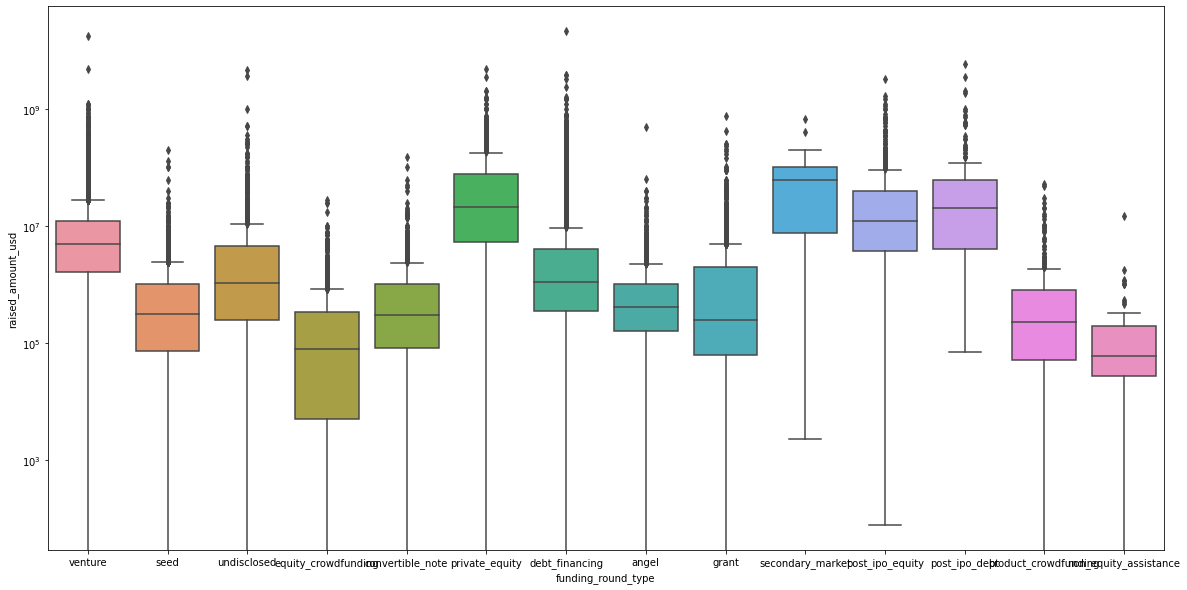

In [27]:
# Box plots for raised amount by each funding type
plt.figure(figsize=[20,10])
g = sns.boxplot(master_frame['funding_round_type'], master_frame.raised_amount_usd)
g.set_yscale("log") # y axis by log scale for clearity in plot
plt.show()

From the box plots for different funding type it can be seen that there are many outliers (values outside upper fence), due to which for imputing the missing raised_amount_usd we cannot use the mean value as it may deviate our analysis. Hence we have to consider median values for imputing.

In [28]:
# median value of raised_amount_usd which is more that 1 million
master_frame.raised_amount_usd.median()

1842555.0

In [29]:
# For imputing and having insight about the raised amount values for each funding type we first group the data frame
# by funding type 
master_by_fund_type = master_frame.groupby(['funding_round_type'])

In [30]:
# Using the above groupby object to get the central tendancies for all the funding type.
master_by_fund_type.raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,3982.0,9.947552e+05,8.097381e+06,0.0,157504.00,415000.0,1.000000e+06,4.945120e+08
convertible_note,1275.0,1.340013e+06,6.085538e+06,0.0,82013.00,300000.0,1.000000e+06,1.500000e+08
debt_financing,6126.0,1.789101e+07,2.925953e+08,0.0,349940.00,1100000.0,4.000000e+06,2.127194e+10
equity_crowdfunding,1126.0,5.112600e+05,1.756837e+06,0.0,5000.00,80074.0,3.383222e+05,2.740000e+07
grant,1862.0,4.286180e+06,2.512328e+07,0.0,62448.25,250000.0,2.000000e+06,7.500000e+08
non_equity_assistance,59.0,4.605890e+05,1.959476e+06,0.0,27000.00,60000.0,1.927670e+05,1.500000e+07
post_ipo_debt,138.0,1.754697e+08,6.296757e+08,70000.0,4017500.00,20000000.0,6.000000e+07,5.800000e+09
post_ipo_equity,547.0,6.709361e+07,2.136634e+08,77.0,3745981.00,12000000.0,3.938415e+07,3.200000e+09
private_equity,1731.0,7.579720e+07,2.061303e+08,0.0,5400000.00,21000000.0,7.699983e+07,4.745460e+09


In [31]:
# Now here find the missing raised_amount_usd counts for each funding type. This will be required
# to decide on how we can impute the missing values. We see for the desired funding_types of Spark Funds -
# seed, venture have substantial missing values.
master_frame.raised_amount_usd.isnull().groupby(master_frame['funding_round_type']).sum()

funding_round_type
angel                     937
convertible_note          314
debt_financing            198
equity_crowdfunding      1975
grant                      60
non_equity_assistance      80
post_ipo_debt               0
post_ipo_equity             9
private_equity            260
product_crowdfunding       21
secondary_market           60
seed                     5166
undisclosed              2791
venture                  4245
Name: raised_amount_usd, dtype: int64

The above two cells show the median values with respect to the different funding_type. Medians are varying depending on the funding type. Imputing column median in all the missing cells of irrespective of funding_type will not be useful mainly for funding_types like seed, non_equity_assistance (which have lower range of fund raised). Also in the above cells we see the count of missing values is substantial for funding_types like seed and venture. So imputing these missing values with less accurate values might make it unrealistic. Instead we can impute the missing values with its category median, which will be more realistic and will not give wrong results.

In [32]:
# As per above observations and decision imputing missing values for raised_amount_usd with median of that funding_type category.
master_frame.raised_amount_usd = master_frame.groupby(['funding_round_type']).raised_amount_usd.transform(lambda x: x.fillna(x.median()))

In [33]:
# check to see the raised_amount_usd missing values are imputed and number of missing values are 0.
master_frame.isnull().sum()

company_permalink        0
funding_round_type       0
funded_at                0
raised_amount_usd        0
name                     0
category_list         1413
status                   0
country_code             0
dtype: int64

In [34]:
# For visual inspection
master_frame.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/ORGANIZATION/-FAME,venture,05-01-2015,10000000.0,#fame,Media,operating,IND
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/ORGANIZATION/-QOUNTER,seed,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/ORGANIZATION/0-6-COM,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN
4,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA


### Begin with funding type analysis

In [35]:
# Creating a dataframe for plotting the funds raised by desired funding types of Spark Funds
# Spark Funds intends to consider following funding types : venture, seed, angel and private_equity
master_frame_plotFundingType = master_frame[(master_frame.funding_round_type == 'venture') |
                                           (master_frame.funding_round_type == 'seed') |
                                           (master_frame.funding_round_type == 'angel') |
                                           (master_frame.funding_round_type == 'private_equity')]

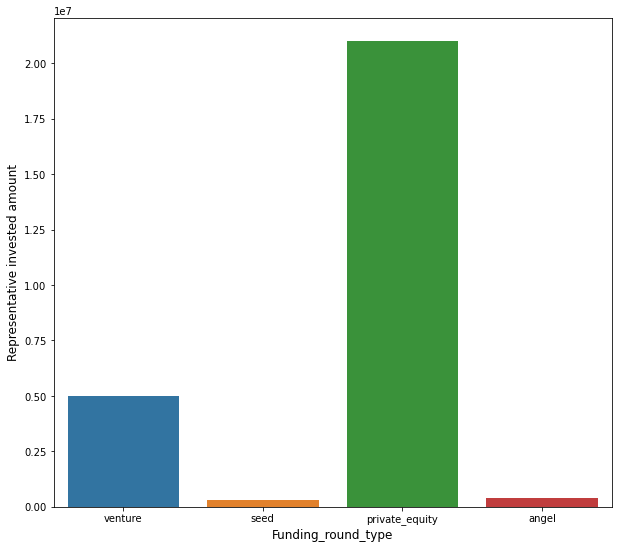

In [36]:
# This is the first Funding Type Analysis.
# Below plot shows the fund raised by the four desired funding types
# Spark Funds want to invest 5-15 million usds. With this it can be seen 
# Spark Funds can invest in 'venture' funding type as funding amount is 5 million.
# private_equity funding type is out of its reach as it attracted funding of amount more than 20 million
# seed and angel raised less funds as compared to other two funding types. Investing in both the 
# funding types will also not be possible as it will be still less than 5 million usds (minimum Spark funds want to invest)
plt.figure(figsize=[10,9])
sns.barplot(data=master_frame_plotFundingType, x="funding_round_type", y="raised_amount_usd", estimator=np.median)
plt.ylabel("Representative invested amount", size=12)
plt.xlabel("Funding_round_type", size=12)
plt.show()

In [37]:
master_frame_plotFundingType.groupby(['funding_round_type']).raised_amount_usd.median()

funding_round_type
angel               415000.0
private_equity    21000000.0
seed                310000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

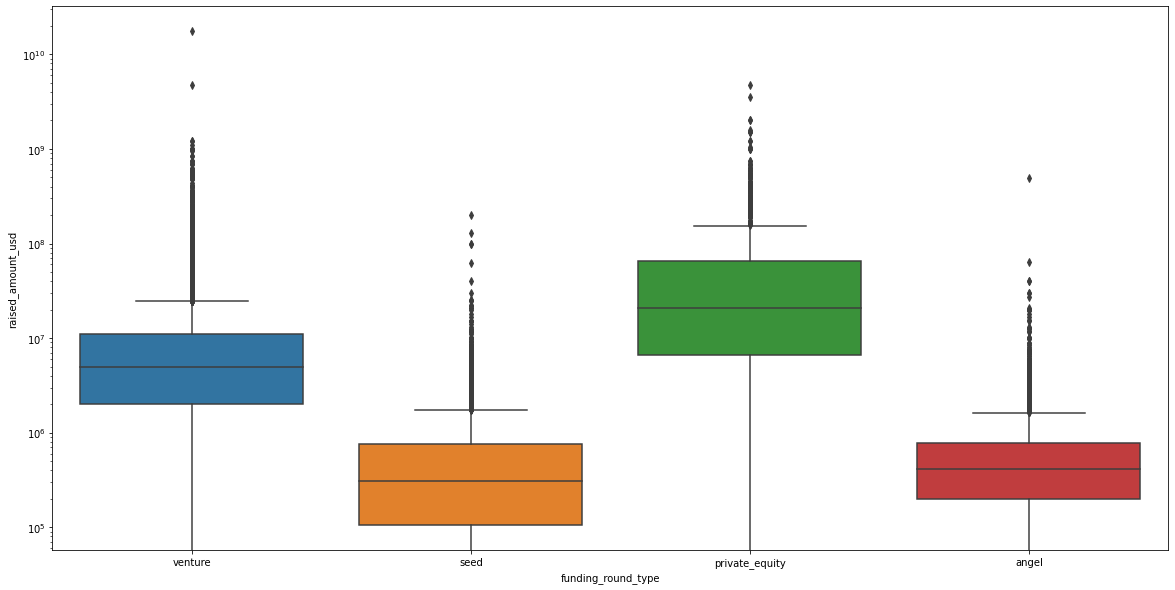

In [38]:
# Box plots for raised amount by each desired funding type
plt.figure(figsize=[20,10])
g = sns.boxplot(master_frame_plotFundingType['funding_round_type'], master_frame_plotFundingType.raised_amount_usd)
g.set_yscale("log") # y axis by log scale for clearity in plot
plt.show()

In [39]:
# Choosing funding as 'venture' for investing the funds.
# Hence focussing the further analysis with this funding type and filtering the master_frame 
# to have only observations of "venture" funding type.
master_frame_venture = master_frame[(master_frame.funding_round_type == 'venture')]

In [40]:
# check the  reduced shape due to above filter
master_frame_venture.shape

(49194, 8)

In [41]:
# another check to ensure only observations for venture funding type are involved in further analysis
master_frame_venture.funding_round_type.value_counts()

venture    49194
Name: funding_round_type, dtype: int64

### After deciding on the funding type beginning with country analysis

In [42]:
# Created a csv file having the list of all the English speaking country codes. 
# Spark funds wants to invest only in English Speaking countries
english_spk_countries = pd.read_csv("./EnglishSpCntrs.csv") 
english_spk_countries.head()

,EngSpeaking
0,AUS
1,NZL
2,GBR
3,USA
4,ATG


In [43]:
# Adding a new column to the master_venture_frame to indicate if the country is English speaking or not. 
master_frame_venture['IsEngSpeaking'] = master_frame_venture['country_code'].apply(
    lambda x: np.isin(x,english_spk_countries.EngSpeaking))

In [44]:
# Check the shape to ensure the above addition of column
master_frame_venture.shape

(49194, 9)

In [45]:
# Visual inspection of above operation
master_frame_venture.sample(10)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking
53023,/ORGANIZATION/METABOLON,venture,01-08-2003,4000000.0,Metabolon,Biotechnology|Health Diagnostics,operating,USA,True
11749,/ORGANIZATION/BLUE-ROOSTER,venture,22-10-2013,3000000.0,Blue Rooster,Software,operating,USA,True
83608,/ORGANIZATION/SWIPP,venture,22-04-2013,2000000.0,Swipp,Analytics|Big Data|Social Media,operating,USA,True
64544,/ORGANIZATION/PERMEO,venture,01-10-2002,5000000.0,Permeo Technologies,Information Services|Security|Software,acquired,USA,True
20923,/ORGANIZATION/COUNTERTACK,venture,25-09-2015,17935732.0,CounterTack,Cloud Security|Security,operating,USA,True
21107,/ORGANIZATION/COZY,venture,15-10-2013,5000000.0,Cozy,Finance|Online Rental|Property Management|Real...,operating,USA,True
58958,/ORGANIZATION/NISTICA,venture,22-03-2010,6500000.0,Nistica,Web Hosting,operating,USA,True
42769,/ORGANIZATION/INTREORG-SYSTEMS,venture,27-11-2012,250000.0,INTREorg SYSTEMS,Consulting,operating,USA,True
53085,/ORGANIZATION/METAMIND,venture,05-12-2014,8000000.0,MetaMind,Artificial Intelligence|Big Data|Computer Visi...,operating,USA,True
71397,/ORGANIZATION/REGADO-BIOSCIENCES,venture,27-03-2007,23000000.0,Regado Biosciences,Biotechnology|Health Care,ipo,USA,True


In [46]:
# Filter out the non-English speaking countries from the master_frame_venture dataframe
master_frame_venture_EngSpeaking = master_frame_venture[(master_frame_venture.IsEngSpeaking == True)]

In [47]:
# Check the reduced shape due to the operation in previous cell
master_frame_venture_EngSpeaking.shape

(41059, 9)

In [48]:
# Group by the country_code and check for the top 9 countries for total amount raised.
topEngSpCountries = master_frame_venture_EngSpeaking.groupby(['country_code']).raised_amount_usd.sum().sort_values(ascending = False)

In [49]:
# Create a dataframe 'top9' having the top 9 countries with the total amount of fund raised by them
top9 = pd.DataFrame(topEngSpCountries.head(9).reset_index())
top9

,country_code,raised_amount_usd
0,USA,4.103551e+11
1,GBR,1.938634e+10
2,IND,1.487060e+10
3,CAN,9.255487e+09
4,SGP,3.059136e+09
5,IRL,1.900739e+09
6,AUS,1.327745e+09
7,NZL,4.288804e+08
8,ZAF,2.982131e+08


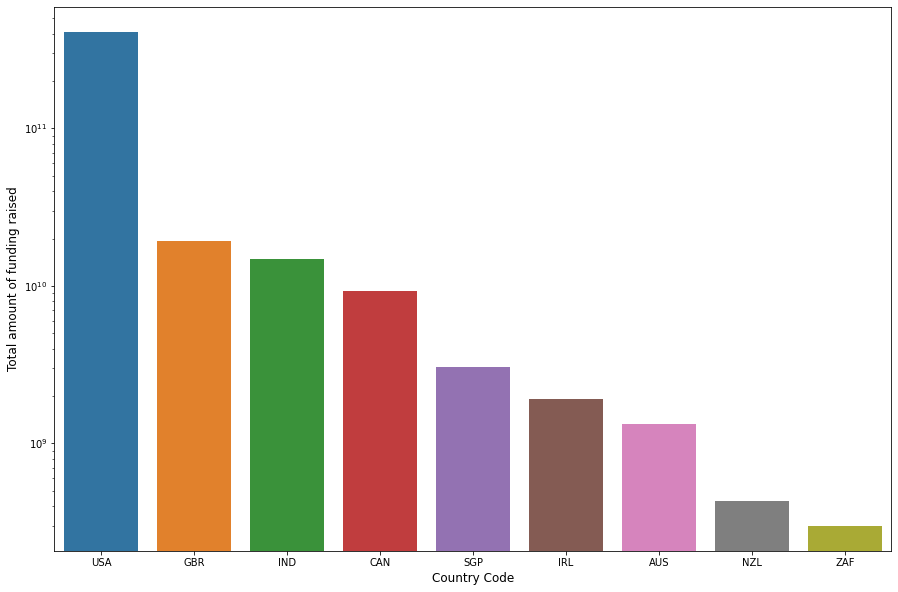

In [50]:
# The below plot helps in our country analysis.
# From the plot it can be seen that the top 3 countries which have attracted the most of the investment are
# USA, GBR and IND. Actual values can be seen from the dataframe top9 from previous cell.
plt.figure(figsize=[15,10])
g = sns.barplot(data=top9, x="country_code", y="raised_amount_usd")
g.set_yscale("log") # y axis by log scale for clearity in plot
plt.ylabel("Total amount of funding raised", size=12)
plt.xlabel("Country Code", size=12)
plt.show()

### After country analysis beginning with Sector analysis

In [51]:
# Extracting the primary category from the category_list 
master_frame_venture_EngSpeaking.category_list = master_frame_venture_EngSpeaking.category_list.astype('str')

In [52]:
# As required splitting the category_list with delimiter '|' and using the first category as Primary_category.
# Adding additional column for this "Primary_Category"
master_frame_venture_EngSpeaking['Primary_category'] = master_frame_venture_EngSpeaking['category_list'].apply(
    lambda x : x.split('|', maxsplit=1)[0])

In [53]:
# Making the primary_category to LOWER case which will be helpful to get the Main_Sector from this primary_category later.
master_frame_venture_EngSpeaking.Primary_category = master_frame_venture_EngSpeaking.Primary_category.astype('str').str.lower()
# For visual inspection
master_frame_venture_EngSpeaking.head(10)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category
0,/ORGANIZATION/-FAME,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,True,media
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,True,application platforms
4,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA,True,software
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,True,biotechnology
9,/ORGANIZATION/0XDATA,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,True,analytics
10,/ORGANIZATION/0XDATA,venture,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,True,analytics
11,/ORGANIZATION/0XDATA,venture,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,True,analytics
21,/ORGANIZATION/1-MAINSTREAM,venture,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,True,apps
27,/ORGANIZATION/10-MINUTES-WITH,venture,09-10-2014,4000000.0,10 Minutes With,Education,operating,GBR,True,education
31,/ORGANIZATION/1000LOOKZ,venture,22-07-2013,5000000.0,1000Lookz,Beauty,operating,IND,True,beauty


#### Now we need to load the mapping.csv file which has the information to map the Primary_category to corresponding Sector

In [54]:
# loading mapping.csv file and checking for encoding
import chardet
with open("./mapping.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(2000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [55]:
mapping  = pd.read_csv("./mapping.csv", encoding='ascii')
# For visual inspection
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [56]:
# Making the category_list to LOWER case which will help mapping of the Primary_category added to the 
# master_frame_venture_EngSpeaking to category_list of mapping dataframe.
mapping.category_list = mapping.category_list.astype('str').str.lower()
# Error in category_list values like 'na' character pair has been written as '0' has been fixed
mapping.category_list = mapping['category_list'].apply(lambda x : x.replace('0','na'))

In [57]:
# mapping data frame is wide dataframe and we need to convert to long dataframe
value_vars = list(mapping.columns[1:])
id_vars = list(np.setdiff1d(mapping.columns, value_vars))
print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [58]:
# convert into long dataframe using melt function.
long_mapping_df = pd.melt(mapping, 
        id_vars = id_vars, 
        value_vars = value_vars)
# For visual inspection
long_mapping_df.head()

,category_list,variable,value
0,nan,Automotive & Sports,0
1,3d,Automotive & Sports,0
2,3d printing,Automotive & Sports,0
3,3d technology,Automotive & Sports,0
4,accounting,Automotive & Sports,0


In [59]:
# remove rows having value=0
long_mapping_df = long_mapping_df[long_mapping_df['value']==1]
# dropping value column which is not required
long_mapping_df = long_mapping_df.drop('value', axis=1)

# Renaming the column names from long_mapping_df so that these names are useful after merging of dataframes later.
long_mapping_df.rename(columns = {'category_list': 'category', 'variable':'Main_Sector'}, inplace=True)

In [60]:
# Now merging the master_frame_venture_EngSpeaking and long_mapping_df dataframes on columns 'Primary_category' and 'category' respectively
# This merge will map the Primary_category variable value to its corresponding Sector from mapping file, here in dataframe 
# named as 'Main_Sector'
master_frame_venture_EngSpeaking_Sector = pd.merge(master_frame_venture_EngSpeaking, long_mapping_df, how='left', left_on='Primary_category', right_on='category')
# Deleting the 'category' column after merge as it is duplicate to 'Primary_category'
master_frame_venture_EngSpeaking_Sector = master_frame_venture_EngSpeaking_Sector.drop('category', axis=1)
# For visual inspection
master_frame_venture_EngSpeaking_Sector.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
0,/ORGANIZATION/-FAME,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,True,media,Entertainment
1,/ORGANIZATION/-QOUNTER,venture,14-10-2014,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,True,application platforms,"News, Search and Messaging"
2,/ORGANIZATION/004-TECHNOLOGIES,venture,24-07-2014,5000000.0,004 Technologies,Software,operating,USA,True,software,Others
3,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,True,biotechnology,Cleantech / Semiconductors
4,/ORGANIZATION/0XDATA,venture,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,True,analytics,"Social, Finance, Analytics, Advertising"


In [61]:
# Just making sure no observation is lost while doing above operations and the columns are added
master_frame_venture_EngSpeaking_Sector.shape

(41059, 11)

In [62]:
# Finding the missing values for Main_Sector after this mapping operation, which is very less around 0.03%
round(100*(master_frame_venture_EngSpeaking_Sector.isnull().sum()/len(master_frame_venture_EngSpeaking_Sector.index)),2)

company_permalink     0.00
funding_round_type    0.00
funded_at             0.00
raised_amount_usd     0.00
name                  0.00
category_list         0.00
status                0.00
country_code          0.00
IsEngSpeaking         0.00
Primary_category      0.00
Main_Sector           0.03
dtype: float64

In [63]:
# These are the actual 12 rows having missing values for Main_Sector. The reason for this is 
# the Primary_category for these rows are not found in mapping.csv file.
master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.Main_Sector.isnull())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
3229,/ORGANIZATION/ASIA-TRANSLATE,venture,01-09-2009,20000.0,Asia Translate,English-Speaking|Translation,operating,SGP,True,english-speaking,NaN
7709,/ORGANIZATION/CLEAN-VEHICLE-SOLUTIONS,venture,26-02-2010,125000.0,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,True,natural gas uses,NaN
8679,/ORGANIZATION/CONSENSUS-POINT,venture,19-04-2011,788374.0,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,True,enterprise 2.0,NaN
8680,/ORGANIZATION/CONSENSUS-POINT,venture,18-07-2012,2600000.0,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,True,enterprise 2.0,NaN
10691,/ORGANIZATION/DOLORES-SPEECH-PRODUCTS,venture,07-04-2015,250000.0,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,True,adaptive equipment,NaN
13281,/ORGANIZATION/FIVE-BELOW,venture,14-10-2010,194000000.0,Five Below,Specialty Retail,ipo,USA,True,specialty retail,NaN
13368,/ORGANIZATION/FLEXPORT,venture,06-08-2015,20000000.0,Flexport,Enterprise 2.0|Enterprise Software|Insurance|L...,operating,USA,True,enterprise 2.0,NaN
15749,/ORGANIZATION/HEALTHTELL,venture,13-06-2014,9486929.0,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,True,biotechnology and semiconductor,NaN
18864,/ORGANIZATION/JUSTINMIND,venture,17-12-2007,862000.0,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,True,rapidly expanding,NaN
25468,/ORGANIZATION/ONSPRING-TECHNOLOGIES,venture,01-01-2015,2000000.0,Onspring Technologies,Enterprise 2.0|Enterprise Software|Software,operating,USA,True,enterprise 2.0,NaN


In [64]:
# We see there are 0.03% of Sector column entries which are are missing. This is very less amount and can safely be ignored.
# But we also see out of 12 entries 11 are for country USA. From the analysis done till now, USA is one of the desired country 
# to invest in and hence we think twice before just getting rid for these rows with missing Sector. 
# Hence we can decide on filling in mode value for this variable for country USA.

In [65]:
master_frame_venture_EngSpeaking_Sector.isnull().sum()

company_permalink      0
funding_round_type     0
funded_at              0
raised_amount_usd      0
name                   0
category_list          0
status                 0
country_code           0
IsEngSpeaking          0
Primary_category       0
Main_Sector           12
dtype: int64

In [66]:
# Imputing the Main_Sector missing value with 'mode' of Main_Sector for USA. This is fine as mentioned before 11 missing values
# are for USA and the remaining 12th is the country which is not in top 3. Hence it will not affect our sectoral analysis.
master_frame_venture_EngSpeaking_Sector['Main_Sector'] = master_frame_venture_EngSpeaking_Sector['Main_Sector'].fillna(
    master_frame_venture_EngSpeaking_Sector[master_frame_venture_EngSpeaking_Sector.country_code == 'USA'].Main_Sector.mode()[0])

In [67]:
# Checking if missing values after imputing
master_frame_venture_EngSpeaking_Sector.isnull().sum()

company_permalink     0
funding_round_type    0
funded_at             0
raised_amount_usd     0
name                  0
category_list         0
status                0
country_code          0
IsEngSpeaking         0
Primary_category      0
Main_Sector           0
dtype: int64

#### Now, we have 'master_frame_venture_EngSpeaking_Sector' dataframe with only english speaking countries, venture as investment type and having main Sector column according to the primary category from the category list of each company

In [68]:
# Just checking if nothing is lost in the process
master_frame_venture_EngSpeaking_Sector.shape

(41059, 11)

#### Sector analysis for USA

In [69]:
# Extracting the dataframe for country USA for venture funding type from master_frame_venture_EngSpeaking_Sector
D1_venture_USA = master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.country_code == 'USA')]
D1_venture_USA.shape

(35829, 11)

In [70]:
# For finding the total number of investments in USA we need to get rid of observations for which raised_amount_usd is 0.0 as 
# that cannot be considered as investment in that company
D1_venture_USA = D1_venture_USA[(D1_venture_USA.raised_amount_usd != 0.0)]
D1_venture_USA.shape # For answering the questions from Investments sheet Table-5.1

(35809, 11)

In [71]:
# For finding the total amount of investment in USA we need to just compute the total of raised_amount_usd variable
D1_venture_USA.raised_amount_usd.sum() # For answering the questions from Investments sheet Table-5.1

410355149987.0

In [72]:
# Groupby Main_Sector to find the number of investments done in each sector in USA
D1_vec_USA_SectorGrp = D1_venture_USA[(D1_venture_USA.raised_amount_usd != 0.0)].groupby(['Main_Sector'])

In [73]:
# For getting the top 3 sectors which have attracted most 'number' of investments in USA
D1_vec_USA_SectorGrp.company_permalink.count().sort_values(ascending = False)

Main_Sector
Others                                     8200
Cleantech / Semiconductors                 7767
Social, Finance, Analytics, Advertising    7413
News, Search and Messaging                 4234
Health                                     3213
Manufacturing                              2472
Entertainment                              1734
Automotive & Sports                         536
Blanks                                      240
Name: company_permalink, dtype: int64

In [74]:
# To find the company which raised maximum funds from 'Others' sector in USA
D1_ven_USA_Others = D1_venture_USA[(D1_venture_USA.Main_Sector == 'Others')] 
# For answering the questions from Investments sheet Table-5.1
D1_ven_USA_Others[(D1_ven_USA_Others.raised_amount_usd == D1_ven_USA_Others.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
33058,/ORGANIZATION/SOCIAL-FINANCE,venture,30-09-2015,1.000000e+09,SoFi,Education|Finance|Financial Services|Peer-to-Peer,operating,USA,True,education,Others


In [75]:
# To find the company which raised maximum funds from 'Cleantech / Semiconductors' sector in USA
D1_ven_USA_ClSemi = D1_venture_USA[(D1_venture_USA.Main_Sector == 'Cleantech / Semiconductors')]
# For answering the questions from Investments sheet Table-5.1
D1_ven_USA_ClSemi[(D1_ven_USA_ClSemi.raised_amount_usd == D1_ven_USA_ClSemi.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
13789,/ORGANIZATION/FREESCALE,venture,21-10-2006,1.760000e+10,Freescale Semiconductor,Semiconductors,ipo,USA,True,semiconductors,Cleantech / Semiconductors


In [76]:
# Dataframe of USA country with top 3 sectors having most number of investments
D1_ven_USA_SFAA = D1_venture_USA[(D1_venture_USA.Main_Sector == 'Social, Finance, Analytics, Advertising')]
# Creating dataframe for USA with top 3 sectors
DF_USA_Top3Sectors = pd.concat([D1_ven_USA_Others, D1_ven_USA_ClSemi, D1_ven_USA_SFAA], axis = 0)

#### Sector analysis for GBR

In [77]:
# Extracting the dataframe for country GBR for venture funding type from master_frame_venture_EngSpeaking_Sector
D2_venture_GBR = master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.country_code == 'GBR')]
D2_venture_GBR.shape  

(2133, 11)

In [78]:
# For finding the total number of investments in GBR we need to get rid of observations for which raised_amount_usd is 0.0 as 
# that cannot be considered as investment in that company
D2_venture_GBR = D2_venture_GBR[(D2_venture_GBR.raised_amount_usd != 0.0)]
D2_venture_GBR.shape # For answering the questions from Investments sheet Table-5.1

(2132, 11)

In [79]:
# For finding the total amount of investment in GBR we need to just compute the total of raised_amount_usd variable
D2_venture_GBR.raised_amount_usd.sum() # For answering the questions from Investments sheet Table-5.1

19386343570.0

In [80]:
# Groupby Main_Sector to find the number of investments done in each sector in GBR
D2_ven_GBR_SectorGrp = D2_venture_GBR[(D2_venture_GBR.raised_amount_usd != 0.0)].groupby(['Main_Sector'])

In [81]:
# For getting the top 3 sectors which have attracted most 'number' of investments in GBR
D2_ven_GBR_SectorGrp.company_permalink.count().sort_values(ascending = False)

Main_Sector
Others                                     544
Social, Finance, Analytics, Advertising    449
Cleantech / Semiconductors                 428
News, Search and Messaging                 244
Entertainment                              146
Manufacturing                              125
Health                                     119
Automotive & Sports                         48
Blanks                                      29
Name: company_permalink, dtype: int64

In [82]:
# To find the company which raised maximum funds from 'Others' sector in GBR
D2_ven_GBR_Others = D2_venture_GBR[(D2_venture_GBR.Main_Sector == 'Others')]
# For answering the questions from Investments sheet Table-5.1
D2_ven_GBR_Others[(D2_ven_GBR_Others.raised_amount_usd == D2_ven_GBR_Others.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
25425,/ORGANIZATION/ONEWEB,venture,26-06-2015,500000000.0,OneWeb,Technology,operating,GBR,True,technology,Others


In [83]:
# To find the company which raised maximum funds from 'Social, Finance, Analytics, Advertising' sector in GBR
D2_ven_GBR_SFAA = D2_venture_GBR[(D2_venture_GBR.Main_Sector == 'Social, Finance, Analytics, Advertising')]
# For answering the questions from Investments sheet Table-5.1
D2_ven_GBR_SFAA[(D2_ven_GBR_SFAA.raised_amount_usd == D2_ven_GBR_SFAA.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
21905,/ORGANIZATION/MEREO,venture,29-07-2015,119000000.0,Mereo,Consulting,operating,GBR,True,consulting,"Social, Finance, Analytics, Advertising"


In [84]:
# Dataframe of GBR country with top 3 sectors having most number of investments
D2_ven_GBR_ClSm = D2_venture_GBR[(D2_venture_GBR.Main_Sector == 'Cleantech / Semiconductors')]
# Creating dataframe for GBR with top 3 sectors
DF_GBR_Top3Sectors = pd.concat([D2_ven_GBR_Others, D2_ven_GBR_SFAA, D2_ven_GBR_ClSm], axis = 0)

#### Sector analysis for IND

In [85]:
# Extracting the dataframe for country IND for venture funding type from master_frame_venture_EngSpeaking_Sector
D3_venture_IND = master_frame_venture_EngSpeaking_Sector[(master_frame_venture_EngSpeaking_Sector.country_code == 'IND')]
D3_venture_IND.shape

(961, 11)

In [86]:
# For finding the total number of investments in IND we need to get rid of observations for which raised_amount_usd is 0.0 as 
# that cannot be considered as investment in that company
D3_venture_IND = D3_venture_IND[(D3_venture_IND.raised_amount_usd != 0.0)]
D3_venture_IND.shape # For answering the questions from Investments sheet Table-5.1

(960, 11)

In [87]:
# For finding the total amount of investment in IND we need to just compute the total of raised_amount_usd variable
D3_venture_IND.raised_amount_usd.sum() # For answering the questions from Investments sheet Table-5.1

14870603718.0

In [88]:
# Groupby Main_Sector to find the number of investments done in each sector in IND
D3_ven_IND_SectorGrp = D3_venture_IND[(D3_venture_IND.raised_amount_usd != 0.0)].groupby(['Main_Sector'])

In [89]:
# For getting the top 3 sectors which have attracted most 'number' of investments in IND
D3_ven_IND_SectorGrp.company_permalink.count().sort_values(ascending = False)

Main_Sector
Others                                     320
Social, Finance, Analytics, Advertising    183
News, Search and Messaging                 148
Entertainment                               88
Manufacturing                               64
Cleantech / Semiconductors                  62
Health                                      55
Automotive & Sports                         32
Blanks                                       8
Name: company_permalink, dtype: int64

In [90]:
# To find the company which raised maximum funds from 'Others' sector in IND
D3_ven_IND_Others = D3_venture_IND[(D3_venture_IND.Main_Sector == 'Others')]
# For answering the questions from Investments sheet Table-5.1
D3_ven_IND_Others[(D3_ven_IND_Others.raised_amount_usd == D3_ven_IND_Others.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
13399,/ORGANIZATION/FLIPKART,venture,29-07-2014,1.000000e+09,Flipkart,E-Commerce|Online Shopping,operating,IND,True,e-commerce,Others


In [91]:
# To find the company which raised maximum funds from 'Social, Finance, Analytics, Advertising' sector in IND
D3_ven_IND_SFAA = D3_venture_IND[(D3_venture_IND.Main_Sector == 'Social, Finance, Analytics, Advertising')]
# For answering the questions from Investments sheet Table-5.1
D3_ven_IND_SFAA[(D3_ven_IND_SFAA.raised_amount_usd == D3_ven_IND_SFAA.raised_amount_usd.max())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,IsEngSpeaking,Primary_category,Main_Sector
32108,/ORGANIZATION/SHOPCLUES-COM,venture,19-01-2015,100000000.0,ShopClues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,True,consumer internet,"Social, Finance, Analytics, Advertising"


In [92]:
# Dataframe of IND country with top 3 sectors having most number of investments
D3_ven_IND_NCM = D3_venture_IND[(D3_venture_IND.Main_Sector == 'News, Search and Messaging')]
# Creating dataframe for IND with top 3 sectors
DF_IND_Top3Sectors = pd.concat([D3_ven_IND_Others, D3_ven_IND_SFAA, D3_ven_IND_NCM], axis = 0)

In [93]:
# Finally plot for sector analysis
# We create a dataframe masterSectAnalysisDF for top 3 countries and top 3 sectors for these countries with respect to
# number of investments for each sector
masterSectAnalysisDF = pd.concat([DF_USA_Top3Sectors, DF_GBR_Top3Sectors, DF_IND_Top3Sectors], axis = 0)
masterSectAnalysisDF.shape

(25452, 11)

In [94]:
# To cross check/tally with the shape data from earlier data for individual countries
masterSectAnalysisDF.country_code.value_counts()

USA    23380
GBR     1421
IND      651
Name: country_code, dtype: int64

<Figure size 1080x720 with 0 Axes>

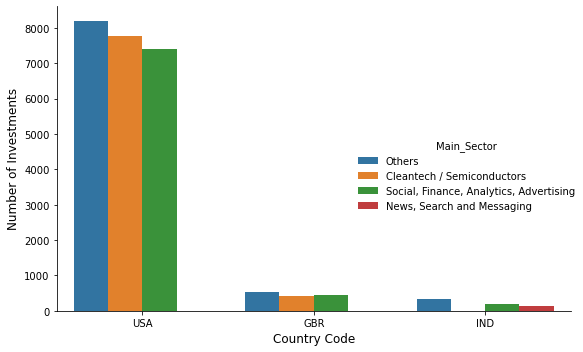

In [95]:
# It can be seen that USA has attracted maximum number of investments for venture funding type followed by GBR and then IND.
# The 'others' sector is attracting maximum number of investments.
# After 'others', 'Social, Finance, Analytics, Advertising' sector is gathering investments.
plt.figure(figsize=[15,10])
sns.catplot(x = "country_code", kind = "count", data = masterSectAnalysisDF, hue="Main_Sector")
plt.ylabel("Number of Investments", size=12)
plt.xlabel("Country Code", size=12)
plt.tight_layout()
plt.show()